In [38]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [3]:
df = pd.read_csv('titainic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop(columns=['Cabin', 'PassengerId'], inplace=True)

In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [10]:
df.shape

(712, 10)

In [16]:
df['Initial'] = 0

for i in df:
    df['Initial'] = df['Name'].str.extract('([A-Za-z]+)\.')

df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don']
                        ,['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


# fill na values
df.loc[(df['Age'].isnull()) & (df['Initial'] == 'Mr'), 'Age'] = 33
df.loc[(df['Age'].isnull()) & (df['Initial'] == 'Master'), 'Age'] = 5
df.loc[(df['Age'].isnull()) & (df['Initial'] == 'Miss'), 'Age'] = 22
df.loc[(df['Age'].isnull()) & (df['Initial'] == 'Mrs'), 'Age'] = 36
df.loc[(df['Age'].isnull()) & (df['Initial'] == 'Other'), 'Age'] = 45

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     712 non-null    int64  
 6   Parch     712 non-null    int64  
 7   Ticket    712 non-null    object 
 8   Fare      712 non-null    float64
 9   Embarked  712 non-null    object 
 10  Initial   712 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [27]:
df.drop(columns=['Name', 'Initial', 'Ticket'], inplace=True)

In [28]:
df= pd.get_dummies(df, drop_first=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Pclass      712 non-null    int64  
 2   Age         712 non-null    float64
 3   SibSp       712 non-null    int64  
 4   Parch       712 non-null    int64  
 5   Fare        712 non-null    float64
 6   Sex_male    712 non-null    uint8  
 7   Embarked_Q  712 non-null    uint8  
 8   Embarked_S  712 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 41.0 KB


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [30]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
log = LogisticRegression()

In [33]:
log.fit(X_train, y_train)

C:\Users\go27s\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred = log.predict(X_test)

In [35]:
accuracy_score(y_test, y_pred)

0.7972027972027972

In [36]:
roc_auc_score(y_test, y_pred)

0.7816468253968254

model 1 AUC score: 0.7816468253968254


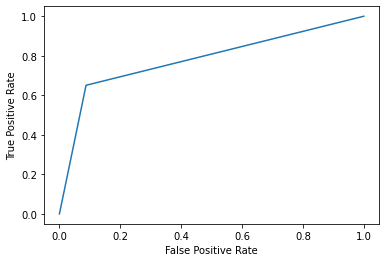

In [39]:
def plot_roc_curve(true_y, pred_y):
    fpr, tpr, thresholds = roc_curve(true_y, pred_y)
    plt.plot(fpr,tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
    
plot_roc_curve(y_test, y_pred)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred)}')